# Pandas Plotting

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range('2016/1/1',periods=1000))

In [5]:
ts = ts.cumsum()  # row 값 누적하여 합산

In [6]:
ts.head()

2016-01-01    0.014802
2016-01-02    1.120578
2016-01-03    1.287660
2016-01-04    0.703618
2016-01-05   -0.388149
Freq: D, dtype: float64

In [7]:
ts.tail()

2018-09-22   -2.953233
2018-09-23   -2.989981
2018-09-24   -1.850860
2018-09-25   -0.637158
2018-09-26   -1.188038
Freq: D, dtype: float64

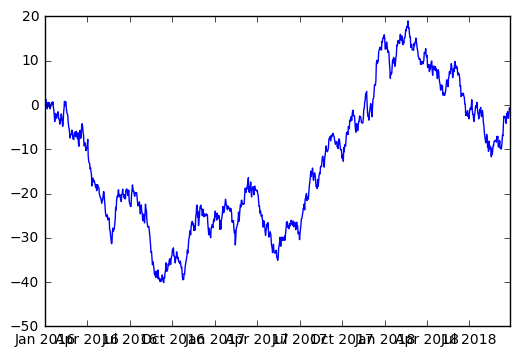

In [8]:
plt.plot(ts)
plt.show()

### 컬럼이 여러 개인 경우

In [9]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index=ts.index, columns=['A', 'B', 'C', 'D'])

In [10]:
df = df.cumsum()

In [11]:
df.head()

,A,B,C,D
2016-01-01,1.139640,-2.831191,0.185204,-1.497167
2016-01-02,0.564647,-3.338029,-0.095659,-0.794369
2016-01-03,1.242442,-3.432665,0.267830,0.093810
2016-01-04,0.899773,-1.714495,0.371067,-0.643673
2016-01-05,2.271324,-0.801434,-0.691517,-1.472920


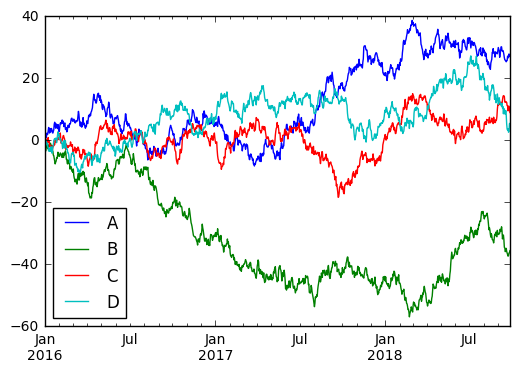

In [12]:
plt.figure()
df.plot()               # plt 레이어 위에 컬럼별로 그래프 표현
plt.legend(loc='best')  # 범례 위치를 자동으로 설정
plt.show()

### csv, excel 파일로 저장

In [13]:
df.to_csv('test1.csv')

In [14]:
df.to_excel('test2.xlsx', sheet_name='cumsum')

### csv 파일에서 데이터 불러오기

In [15]:
df = pd.read_csv('population.csv', index_col=0) # 첫번째 컬럼을 인덱스로 사용

In [16]:
df.head()

,pop,year
0,2.53,1950
1,2.57,1951
2,2.62,1952
3,2.67,1953
4,2.71,1954


In [17]:
df.tail()

,pop,year
146,10.81,2096
147,10.82,2097
148,10.83,2098
149,10.84,2099
150,10.85,2100


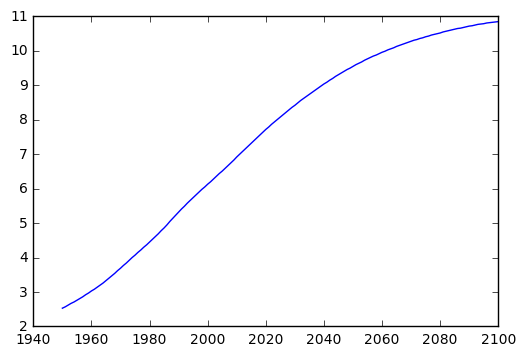

In [18]:
plt.plot(df['year'], df['pop'])
plt.show()

### 히스토그램

In [19]:
df = pd.read_csv('worldreport.csv', index_col=0)

In [20]:
df.head()

,gdp_cap,life_exp,popul
0,974.58,43.82,31.88
1,5937.02,76.42,3.60
2,6223.36,72.30,33.33
3,4797.23,42.73,12.42
4,12779.37,75.31,40.30


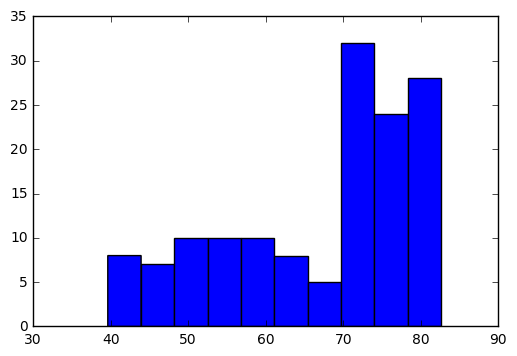

In [21]:
plt.hist(df['life_exp'])   # 자동으로 데이터를 나눔 (binning)
plt.show()

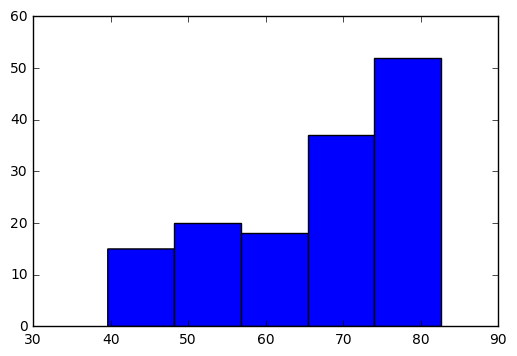

In [22]:
plt.hist(df['life_exp'], bins = 5)   # 연속형 변수의 범주를 5개로 나눈다.
plt.show()

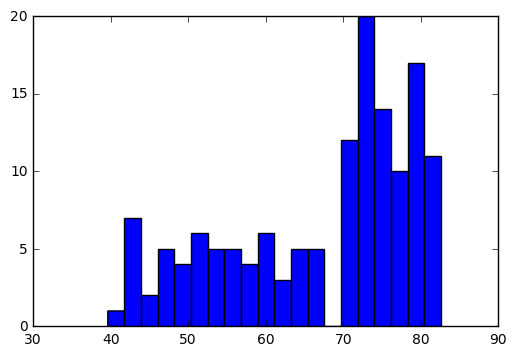

In [23]:
plt.hist(df['life_exp'], bins = 20)   # 연속형 변수의 범주를 20개로 나눈다
plt.show()
plt.clf()

### 산점도 (Scatter plot)

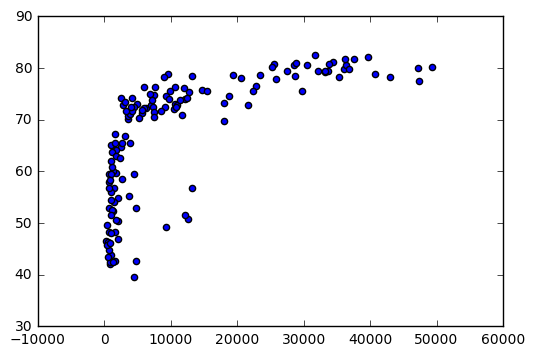

In [24]:
plt.scatter(df['gdp_cap'], df['life_exp'])
plt.show()

In [25]:
# 인구에 따른 점 크기 표현

In [26]:
plt.scatter(df['gdp_cap'], df['life_exp'], 
            s = np.array(df['popul']) * 2)

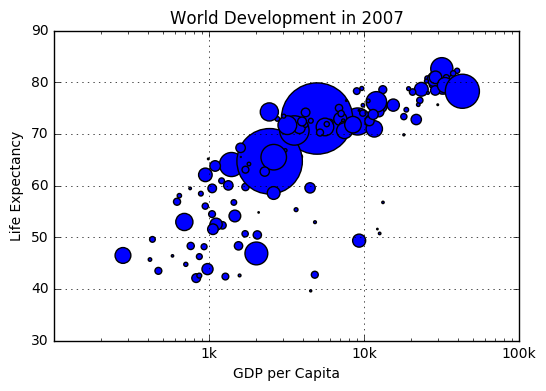

In [27]:
plt.xscale('log')               # 단위가 크기 때문에 log 변환
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('World Development in 2007')
tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)  # Adapt the ticks on the x-axis
plt.grid(True)
plt.show()